In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [116]:
# Load training data
training_data = pd.read_csv("/kaggle/input/titanic/train.csv")

# Load testing data
testing_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Data exploration

In [117]:
# I think name prefix would be a feature
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# Check for nulls values
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
# Check Ticket classes. It seems Ticket number is a kind of ID for tripulants. Due to unique tickets numbers against rows numbers, i can say this ticket would be a unique id.  
training_data["Ticket"].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
347088                6
                     ..
364846                1
SOTON/O.Q. 3101312    1
347087                1
3101298               1
STON/O 2. 3101275     1
Name: Ticket, Length: 681, dtype: int64

In [120]:
# Check how many numeric ticked number exists. This would be a new feature, because is the best way to use Ticket column.
training_data[training_data["Ticket"].str.isnumeric() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [121]:
# Check Cabins per tripulant but this feature wont be used due to huge amount of NaN values
training_data["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
E101           3
              ..
A20            1
B80            1
C91            1
A34            1
E40            1
Name: Cabin, Length: 147, dtype: int64

In [122]:
# Print count of dead people depending on specific classes

print(pd.pivot_table(training_data, index="Survived", columns="Sex", values="Ticket", aggfunc="count"), "\n")

print(pd.pivot_table(training_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count"), "\n")

print(pd.pivot_table(training_data, index="Survived", columns="Embarked", values="Ticket", aggfunc="count"))

Sex       female  male
Survived              
0             81   468
1            233   109 

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


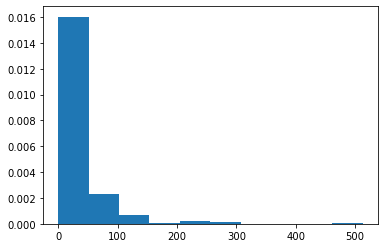

In [123]:
# Plot histogram of Fare to observe distribution. This feature wont be used due to being so realted with Ticket.
plt.hist(x=training_data["Fare"], density=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


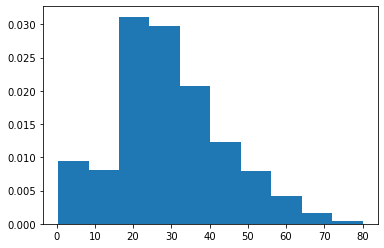

In [124]:
# Plot histogram of Age to observe distribution 
plt.hist(x=training_data["Age"], density=True)
plt.show()

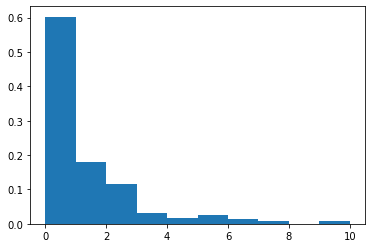

In [125]:
# Plot histogram of familiars to observe distribution. These columns means that someone is in group or alone.
familiars_data = training_data["SibSp"] + training_data["Parch"]
plt.hist(x=familiars_data, density=True)
plt.show()

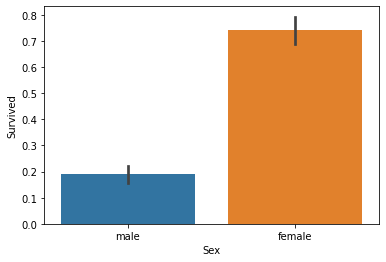

In [126]:
# Plot survived people (mean) taking into account Sex
sns.barplot(x=training_data["Sex"], y=training_data["Survived"])
plt.show()

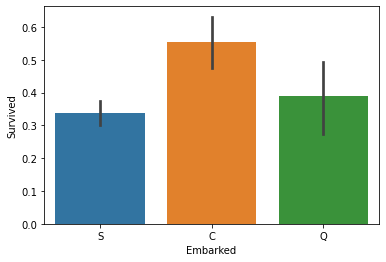

In [127]:
# Plot survived (mean) people taking into account Embarked
sns.barplot(x=training_data["Embarked"], y=training_data["Survived"])
plt.show()

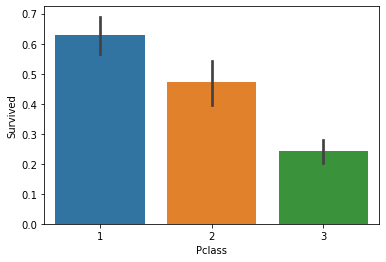

In [128]:
# Plot survived (mean) people taking into account Pclass
sns.barplot(x=training_data["Pclass"], y=training_data["Survived"])
plt.show()

# Prepare training and testing data

In [129]:
def prepare_data(df):
    # Create a new feature based on SibSp and Parch. These columns are related with if a tripulant have a group, so sum them
    df["GroupSize"] = df["SibSp"] + df["Parch"]

    # Represent Sex and Embarked data as integer data
    df["Sex"].replace(["male", "female"], [0, 1], inplace=True)
    df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)

    # Ticket is kind of ID for username but sometimes a bunch of tripulants get the same Ticket number.
    # Create a feature taking into account if Ticket number is numeric or not
    df["TicketNumeric"] = df.apply(lambda row: 1 if row["Ticket"].isnumeric() else 0, axis=1)

    # Create a new Feature based on name prefix
    df["NamePrefix"] = df.apply(lambda row: row["Name"].split(",")[1].split(".")[0].strip(), axis=1)

    # Handle Age NaN values as filling them with median
    df["Age"].fillna(training_data["Age"].mean(), inplace=True)

    # Drop unused columns
    df.drop(["SibSp", "Parch", "PassengerId", "Name", "Ticket", "Cabin", "Fare"], axis=1, inplace=True)

    # Drop NaN Embarked rows. I did it because there are only 2 rows
    df.dropna(subset=["Embarked"], inplace=True)

# Prepare training and testing data
prepare_data(training_data)
prepare_data(testing_data)

In [130]:
training_data.head()

,Survived,Pclass,Sex,Age,Embarked,GroupSize,TicketNumeric,NamePrefix
0,0,3,0,22.0,0.0,1,0,Mr
1,1,1,1,38.0,1.0,1,0,Mrs
2,1,3,1,26.0,0.0,0,0,Miss
3,1,1,1,35.0,0.0,1,1,Mrs
4,0,3,0,35.0,0.0,0,1,Mr


# Model

In [ ]:
# Check correlation between features on training data
correlation = training_data.corr()

# Plot correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.show()